# EDA

In [71]:
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [4]:
df.shape

(398, 9)

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
profile = ProfileReport (df=df, title = 'Miles Per Gallon')

In [9]:
type(profile)

ydata_profiling.profile_report.ProfileReport

In [10]:
profile.to_file('./finalprojects/MPG.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Preparation

In [11]:
#Imputation

In [12]:
numerical = [0,1,2,3,4,5]

In [14]:
nums = df.columns[numerical].tolist()
nums

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']

In [15]:
categorical = [6,7,8]

In [16]:
cats = df.columns[categorical].tolist()
cats

['model_year', 'origin', 'name']

In [17]:
print(nums, '\n', cats)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'] 
 ['model_year', 'origin', 'name']


In [40]:
df_nums = df[nums]
df_cats = df[cats]
df_nums
df_cats

,model_year,origin,name
0,70,usa,chevrolet chevelle malibu
1,70,usa,buick skylark 320
2,70,usa,plymouth satellite
3,70,usa,amc rebel sst
4,70,usa,ford torino
...,...,...,...
393,82,usa,ford mustang gl
394,82,europe,vw pickup
395,82,usa,dodge rampage
396,82,usa,ford ranger


In [41]:
null_med = SimpleImputer(missing_values=np.nan, strategy = 'median')
null_med.fit(df_nums)

SimpleImputer(strategy='median')

In [42]:
#prepare the numeric data
numberstf = pd.DataFrame(null_med.transform(df_nums), columns=df_nums.columns)
numberstf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5


In [43]:
null_med.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'keep_empty_features': False,
 'missing_values': nan,
 'strategy': 'median',
 'verbose': 'deprecated'}

In [44]:
cats_null = SimpleImputer(missing_values=np.nan, strategy = "constant", fill_value='Missing')
cats_null.fit(df_cats)

SimpleImputer(fill_value='Missing', strategy='constant')

In [45]:
cats_null.get_params()

{'add_indicator': False,
 'copy': True,
 'fill_value': 'Missing',
 'keep_empty_features': False,
 'missing_values': nan,
 'strategy': 'constant',
 'verbose': 'deprecated'}

In [46]:
categorytf = pd.DataFrame(cats_null.transform(df_cats), columns=df_cats.columns)
categorytf

,model_year,origin,name
0,70,usa,chevrolet chevelle malibu
1,70,usa,buick skylark 320
2,70,usa,plymouth satellite
3,70,usa,amc rebel sst
4,70,usa,ford torino
...,...,...,...
393,82,usa,ford mustang gl
394,82,europe,vw pickup
395,82,usa,dodge rampage
396,82,usa,ford ranger


In [48]:
df2 = pd.merge(categorytf, numberstf, left_index= True, right_index=True)
df2

,model_year,origin,name,mpg,cylinders,displacement,horsepower,weight,acceleration
0,70,usa,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0
1,70,usa,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5
2,70,usa,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0
3,70,usa,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0
4,70,usa,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...,...,...,...
393,82,usa,ford mustang gl,27.0,4.0,140.0,86.0,2790.0,15.6
394,82,europe,vw pickup,44.0,4.0,97.0,52.0,2130.0,24.6
395,82,usa,dodge rampage,32.0,4.0,135.0,84.0,2295.0,11.6
396,82,usa,ford ranger,28.0,4.0,120.0,79.0,2625.0,18.6


# Encoding

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_year    398 non-null    object 
 1   origin        398 non-null    object 
 2   name          398 non-null    object 
 3   mpg           398 non-null    float64
 4   cylinders     398 non-null    float64
 5   displacement  398 non-null    float64
 6   horsepower    398 non-null    float64
 7   weight        398 non-null    float64
 8   acceleration  398 non-null    float64
dtypes: float64(6), object(3)
memory usage: 28.1+ KB


In [92]:
x = df2.loc[:,df2.columns!='mpg']
y = df2.loc[:,df2.columns=='mpg'].values[:,0]

In [93]:
x = pd.get_dummies(data=x, drop_first= True)

C:\Users\mairi\AppData\Local\Temp\ipykernel_29784\3493231793.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  x = pd.get_dummies(data=x, drop_first= True)


In [98]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,8.0,307.0,130.0,3504.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,350.0,165.0,3693.0,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,318.0,150.0,3436.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,304.0,150.0,3433.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,302.0,140.0,3449.0,10.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,4.0,97.0,52.0,2130.0,24.6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,4.0,135.0,84.0,2295.0,11.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,4.0,120.0,79.0,2625.0,18.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
x.isna().sum()

cylinders                    0
displacement                 0
horsepower                   0
weight                       0
acceleration                 0
                            ..
name_vw dasher (diesel)      0
name_vw pickup               0
name_vw rabbit               0
name_vw rabbit c (diesel)    0
name_vw rabbit custom        0
Length: 323, dtype: int64

In [99]:
y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 25. ,
       19. , 16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. ,
       13. , 18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. ,
       27. , 26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. ,
       17. , 11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. ,
       22. , 21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. ,
       14. , 15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. ,
       18. , 18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. ,
       22. , 18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. ,
       15. , 24. , 20. , 11. , 20. , 21. , 19. , 15. , 31. , 26. , 32. ,
       25. , 16. , 16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. ,
       26. , 31. , 32. , 28. , 24. , 26. , 24. , 26

In [100]:
x.to_csv('./finalprojects/x.csv', index = False)

In [101]:
pd.Series(y, name = 'mpg').to_csv('./finalprojects/y.csv', index=False)

# Scaling

In [102]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,8.0,307.0,130.0,3504.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.0,350.0,165.0,3693.0,11.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8.0,318.0,150.0,3436.0,11.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.0,304.0,150.0,3433.0,12.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8.0,302.0,140.0,3449.0,10.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,4.0,140.0,86.0,2790.0,15.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
394,4.0,97.0,52.0,2130.0,24.6,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
395,4.0,135.0,84.0,2295.0,11.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396,4.0,120.0,79.0,2625.0,18.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [104]:
pd.DataFrame(scaled_x, columns=x.columns).to_csv('./finalprojects/scaled_x.csv', index=False)

In [105]:
post_scaled_x = pd.DataFrame(scaled_x, columns=x.columns)

In [106]:
post_scaled_x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189


# Modeling

In [107]:
post_scaled_x

,cylinders,displacement,horsepower,weight,acceleration,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
394,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,19.924859,-0.071067,-0.050189,-0.050189
395,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
396,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189


In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import ResidualsPlot

In [109]:
x_train, x_test, y_train, y_test = train_test_split(post_scaled_x, y, test_size=0.2)
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year_71,model_year_72,model_year_73,model_year_74,model_year_75,...,name_volvo 145e (sw),name_volvo 244dl,name_volvo 245,name_volvo 264gl,name_volvo diesel,name_vw dasher (diesel),name_vw pickup,name_vw rabbit,name_vw rabbit c (diesel),name_vw rabbit custom
320,-0.856321,-0.714680,-0.322309,-0.634239,-0.206262,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
211,0.320935,-0.244154,0.411163,1.004491,0.410972,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
237,-0.856321,-0.916334,-1.081977,-1.087077,0.519896,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
177,-0.856321,-0.753090,-0.243723,-0.326829,-0.206262,-0.275092,-0.275092,-0.334263,-0.269771,3.50238,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,-0.275092,-0.275092,-0.334263,-0.269771,-0.28552,...,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.050189,-0.071067,-0.050189,-0.050189


In [139]:
model = Ridge()

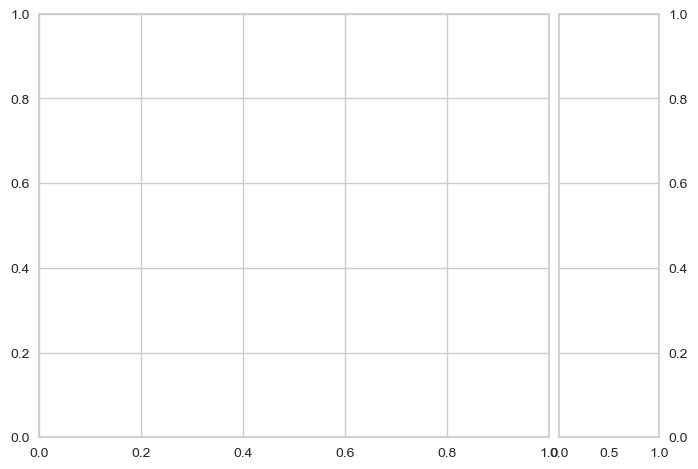

In [142]:
visual = ResidualsPlot(model, train_color='k', test_color='y')

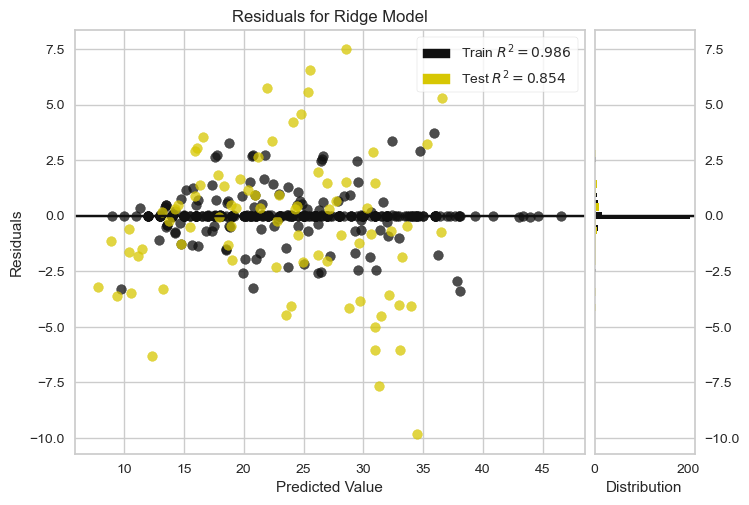

In [143]:
visual.fit(x_train, y_train)  
visual.score(x_test, y_test) 
visual.show();

C:\Users\mairi\miniconda3\envs\ds39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


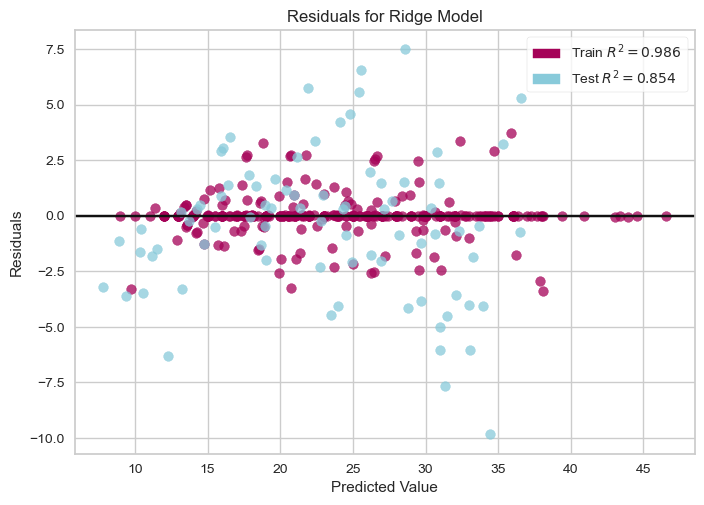

In [146]:
visual2 = ResidualsPlot(model, train_color='m', test_color='c', hist=False)
visual2.fit(x_train, y_train)
visual2.score(x_test, y_test)
visual2.show();

In [152]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from yellowbrick.regressor import PredictionError

In [153]:
model2 = Lasso()
visuallasso = PredictionError(model2)

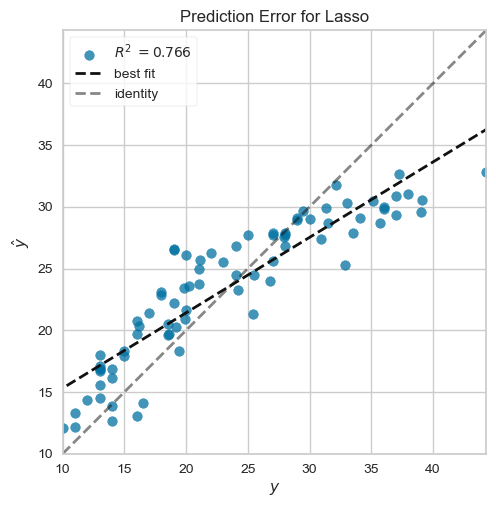

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [154]:
visuallasso.fit(x_train, y_train)
visuallasso.score(x_test, y_test)
visuallasso.show()